In [209]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#from vega_datasets import data
import seaborn as sns
import scipy.stats as st
import sklearn as sk
sns.set()

In [210]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [211]:
# Carregando dataset com os alunos de matematica
students_math = pd.read_csv('../databases/student-mat.zip', compression='zip')
students_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [212]:
# Vamos usar o conjunto dos alunos de matematica como os dados de treino para o modelo
students_math = pd.get_dummies(students_math)

y = students_math[['Walc']].to_numpy()
y = y.reshape(y.shape[0],)

students_math = students_math.drop(columns=['Dalc', 'Walc'])

X = students_math.to_numpy()

print(X)
print(y)

[[18  4  4 ...  0  1  0]
 [17  1  1 ...  1  1  0]
 [15  1  1 ...  1  1  0]
 ...
 [21  1  1 ...  0  1  0]
 [18  3  2 ...  1  1  0]
 [19  1  1 ...  1  1  0]]
[1 1 3 1 2 2 1 1 1 1 2 1 3 2 1 2 2 1 4 3 1 1 3 4 1 3 2 4 1 5 4 1 1 1 1 1 1
 1 1 1 2 4 1 1 2 1 4 1 2 1 3 1 4 3 4 1 1 1 1 1 3 5 1 4 4 2 5 2 3 3 1 1 4 2
 4 3 1 3 1 2 3 2 1 3 3 3 2 3 1 5 3 3 3 1 1 1 1 1 2 1 5 1 1 1 1 1 1 1 5 1 1
 1 1 1 1 2 1 1 4 2 2 2 2 4 1 2 1 1 2 5 2 2 3 4 1 1 4 1 3 1 1 2 1 3 2 2 1 1
 1 5 5 5 3 1 1 1 3 5 2 4 2 4 4 4 5 1 4 1 1 1 4 1 3 1 1 4 4 4 4 1 3 2 3 3 2
 3 2 2 3 5 1 1 5 4 1 1 2 5 3 2 5 3 3 2 1 4 2 1 4 1 2 5 1 4 2 3 4 4 4 1 2 1
 1 5 1 1 3 3 5 2 2 1 3 4 1 3 5 1 1 5 4 3 1 2 1 1 1 5 3 4 4 3 5 3 4 2 1 1 2
 1 3 1 1 1 1 4 4 2 3 2 3 3 1 2 1 3 1 4 1 2 4 4 1 1 2 2 2 1 3 1 4 2 1 1 1 3
 3 2 1 2 1 2 1 2 1 1 1 1 2 3 2 1 2 2 1 1 2 1 5 3 2 1 2 3 3 2 5 5 3 2 4 1 1
 1 1 3 2 3 1 3 3 2 3 2 2 3 2 3 3 5 3 3 3 3 3 1 2 2 2 1 4 3 3 1 2 4 2 2 2 2
 1 3 1 3 1 2 1 4 2 3 4 3 1 3 3 3 2 2 1 1 5 4 3 4 3]


In [213]:
# Carregando dataset com os alunos de portugues
students_por = pd.read_csv('../databases/student-por.zip', compression='zip')
students_por.head()

# Vamos usar o conjunto dos alunos de portugues como os dados de teste para o modelo
students_por = pd.get_dummies(students_por)

y_pt = students_por[['Walc']].to_numpy()
y_pt = y_pt.reshape(y_pt.shape[0],)

students_por = students_por.drop(columns=['Dalc', 'Walc'])

X_pt = students_por.to_numpy()

print(X_pt)
print(y_pt)

[[18  4  4 ...  0  1  0]
 [17  1  1 ...  1  1  0]
 [15  1  1 ...  1  1  0]
 ...
 [18  1  1 ...  0  1  0]
 [17  3  1 ...  1  1  0]
 [18  3  2 ...  1  1  0]]
[1 1 3 1 2 2 1 1 1 1 2 1 3 2 1 2 2 1 4 3 1 1 3 4 1 3 2 4 1 5 4 1 1 1 1 1 1
 1 1 1 2 4 1 1 2 1 4 1 2 1 3 1 4 3 4 1 1 1 1 1 3 5 1 4 4 2 5 2 3 3 1 1 4 2
 4 3 1 3 1 2 3 2 1 3 3 3 2 3 1 5 3 3 3 1 1 1 1 1 2 1 5 1 1 1 1 1 1 1 5 1 1
 1 1 1 1 2 1 1 4 2 2 2 2 4 1 2 1 1 5 2 2 3 2 2 3 4 1 1 1 1 4 1 5 1 2 1 3 1
 1 1 3 3 2 1 3 2 2 1 1 1 4 1 5 5 5 3 1 1 1 3 5 2 4 5 2 4 4 4 5 1 4 1 1 1 4
 1 3 1 1 4 4 4 4 1 3 2 3 3 2 3 2 2 3 5 1 1 5 4 1 1 2 5 3 2 5 3 3 2 1 4 2 1
 4 1 2 5 1 4 2 3 4 4 4 1 2 1 1 5 1 1 3 3 5 2 2 1 3 4 1 3 5 1 2 1 1 1 2 2 1
 2 2 1 1 5 1 3 1 4 3 1 2 4 1 3 1 1 1 2 1 5 3 4 4 3 5 3 4 2 3 1 1 4 3 3 1 1
 2 1 1 2 3 1 1 1 1 3 4 4 2 3 2 3 3 1 2 2 1 3 1 4 1 1 3 2 4 4 4 1 1 2 1 2 2
 1 3 1 4 2 1 1 3 3 2 1 2 1 2 1 1 2 1 1 2 2 2 1 1 1 4 5 1 1 3 1 2 2 1 2 4 3
 1 4 1 2 3 3 2 2 5 5 3 2 5 4 2 1 1 2 1 1 1 3 3 1 3 2 3 2 2 3 2 3 3 2 4 4 1
 1 3 4 3 2 1 2 3 4 

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.predict(X_pt))
students_por['Walc_actual'] = y_pt
students_por['Walc_predicted'] = clf.predict(X_pt)
students_por['index'] = students_por.index

[1 1 1 1 1 1 3 1 1 1 1 1 4 1 1 3 1 1 4 4 1 1 1 1 1 2 1 3 1 5 1 1 1 1 1 1 1
 1 1 1 1 3 1 1 1 1 4 1 1 1 1 1 4 1 1 1 1 1 1 2 3 5 1 1 1 1 1 1 3 1 1 1 3 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 4 1 1 1 4 1 4 1 1 1 1 1 5 1 1
 1 1 3 1 1 1 1 5 4 2 1 1 4 1 4 1 1 4 1 1 1 2 1 3 2 1 1 1 1 4 1 5 1 3 1 3 1
 1 1 1 1 3 1 3 4 1 1 1 1 5 1 4 5 5 1 1 1 4 4 5 2 3 5 5 1 4 1 5 1 4 1 2 1 5
 1 4 5 3 4 3 4 3 1 1 1 1 1 2 3 3 1 1 4 1 1 5 2 2 1 1 5 1 1 1 1 1 2 1 1 1 1
 1 1 1 3 1 3 2 3 3 4 3 1 2 1 1 2 1 1 1 3 1 1 2 1 1 3 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 4 3 2 1 1 4 4 4 1 1 3 1 1 1 1 2 1 3 2 2 4 1 5 2 2 3 1 1 2 5 1 1 3 1
 1 1 1 3 2 1 1 1 1 4 5 1 2 3 3 3 3 1 1 3 1 1 1 4 1 1 3 2 5 4 4 1 1 3 1 2 1
 1 1 1 1 1 1 1 3 3 3 1 2 1 2 1 1 1 1 1 3 1 1 1 2 1 3 2 2 1 2 1 1 1 1 1 4 5
 1 2 1 1 1 1 1 1 5 5 1 1 2 4 5 1 1 2 1 1 1 4 1 1 1 2 1 1 1 1 1 1 1 1 3 4 2
 1 5 5 3 1 1 3 3 3 3 3 2 3 1 1 1 3 3 3 3 1 3 1 1 3 3 2 1 3 3 3 3 2 1 4 3 3
 4 5 1 5 1 2 3 3 3 1 1 1 3 3 1 3 3 2 1 3 4 3 2 2 3 1 3 3 1 3 5 1 3 2 3 1 3
 1 1 3 1 3 3 1 1 3 2 3 1 

C:\Users\diego\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [215]:
clf.score(X_pt, y_pt)
# aprox 0.45, não muito bom

0.4453004622496148

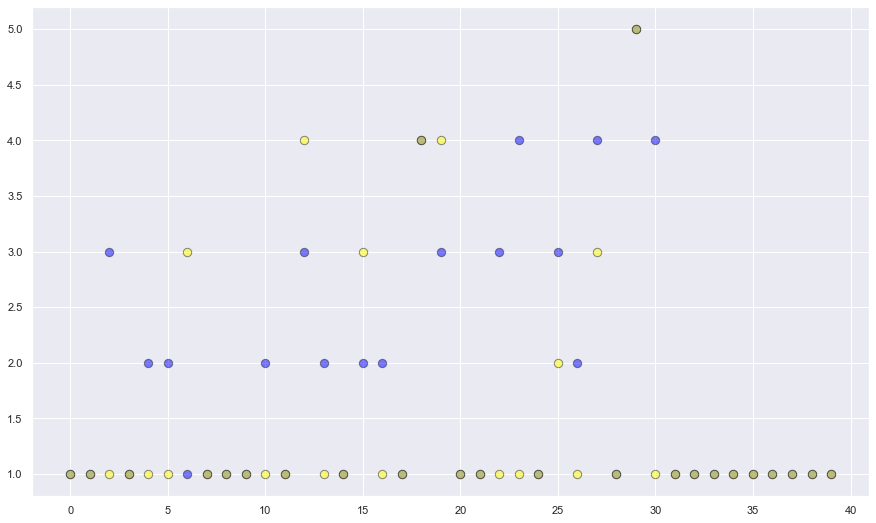

In [216]:
# Pedaco dos dados (40 deles) com o valor real (azul) e o predito (amarelo) pelo modelo (as bolinhas verde são os casos de acerto)
plt.scatter(students_por['index'][0:40], students_por['Walc_actual'][0:40], color='blue', alpha=0.5, edgecolors='k', s=70)
plt.scatter(students_por['index'][0:40], students_por['Walc_predicted'][0:40], color='yellow', alpha=0.5, edgecolors='k', s=70)
plt.show()